In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sy

In [115]:
import jax
import jax.numpy as jnp

from jax import random
from jax import grad,value_and_grad
from jax.test_util import check_grads

**1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

# Number of multiplications: k*(m*n). 

#Number of additions: (k-1)*(m*n). 

>To calculate the number of multiplications and additions performed during matrix multiplication, firstly we need to find out how many multiplications and additions are required to get an element of resultant matrix. So to calculate let's say 1st element, we are reuired to multiply 1st row of matrix1 to the 1st column of matrix2 element-wise respectively. Both will contains the same elements 'k' as number of columns in matrix1 is equal to number of rows of matrix2. So total multiplications required are k (which are element-wise) and adding them together require k-1 additions. So to calculate an element of reultant of matrix no. of multiplications required is k and no. of additions requires is k-1. The number of elements of resultant matrix will be equal to n*m which same as its shape. So total number of multiplications is (no. of elements in resultant matrix) * (no. of multiplications required to calculate single element) which is k*(m*n).
Similarly, total number of additions is (no. of elements in resultant matrix) * (no. of additions required to calculate single element) which is (k-1)*(m*n)

**2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [116]:
# Assuming that matrix1 is of shape n*k and matrix2 is of shape k*m
def simpMatMul (matrix1, matrix2):
    resMatrix = [[sum(i * j for i, j in zip(m1row, m2col))
                        for m2col in zip(*matrix2)]
                                for m1row in matrix1]
    return resMatrix

def numpMatMul (matrix1, matrix2):
    resMatrix = np.matmul(matrix1,matrix2)
    return resMatrix
p = np.random.randint(1,100)
q = np.random.randint(1,100)
r = np.random.randint(1,100)

A = np.random.randint(1,100, size=(p,q))
B = np.random.randint(1,100, size=(q,r))

%timeit simpMatMul(A,B)
%timeit numpMatMul(A,B)
print('Matrix Multiplication using list of lists:',simpMatMul(A,B))
print("=================================")
print('Matrix Multiplication using numpy:',numpMatMul(A,B))


115 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
334 µs ± 5.15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Matrix Multiplication using list of lists: [[153660, 178222, 154857, 150601, 171746, 158985, 165129, 159739, 166797, 160226, 160132, 179584, 167983, 160367, 164504, 178790, 150066, 161085, 168764, 174536, 160987, 176616, 145553, 140052, 147758, 170040, 164190, 160162, 168887, 163795, 145793, 154146, 141211, 152499, 167804, 152304, 160869, 151894, 154371, 145962, 159573, 166633, 175585, 148649, 156174, 165651, 173944, 149409], [191345, 182533, 181800, 175108, 175831, 163889, 185920, 172622, 194672, 178342, 181675, 204244, 192198, 183292, 175496, 196583, 184611, 186414, 188504, 201267, 187591, 191730, 158951, 166046, 179786, 192514, 181001, 179029, 196870, 198188, 172028, 180923, 173884, 162036, 179474, 169466, 185214, 168072, 164279, 176261, 200218, 178324, 194723, 160946, 187470, 181460, 192553, 169279], [199318, 217010, 201895, 184356, 201941, 17

From above results, we came to conclusion that numpy is faster because:


*   numpy contains elements of fixed datatype unlike list which can have elements of different datatype, which require more metadata to store like size, reference count for each element, object type, object value etc. and thus make operations on data slower.
*   at hardware level, numpy get a continuous allocation of memory, which made accessing and processing of data easier unlike list whose actual elements are not necessarily stored in contiguous allocation, as they have pointer allocation of each element at different places in the memory.



**3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

In [117]:

# first method
def clasFindMedian(list1):
    final_list = []
    N = len(list1) 
    for i in range(0, N//2 +1):
        max1 = list1[0]

        for j in range(len(list1)):
            if list1[j] >= max1:
                max1 = list1[j]
                # print('max1:',max1)

        list1.remove(max1);
        final_list.append(max1)
    # print(final_list)
    # print('n:',N)
    if N % 2 != 0:
      # print("odd")
      return final_list[len(final_list)-1]
    else:
      # print('even')
      return (final_list[len(final_list)-1] + final_list[len(final_list)-2])/2.0

    
  # pass

# Better method
def findMedian(arr):
    sorted_arr = sorted(arr)
    arr_len = len(sorted_arr)

    if arr_len % 2 == 0:
      median1 = sorted_arr[arr_len//2]
      median2 = sorted_arr[arr_len//2 - 1]
      median = (median1 + median2)/2
    else:
      median = sorted_arr[arr_len//2]
    return median

numbers = list(np.random.randint(1,10000,(np.random.randint(1,10000))))

a = findMedian(numbers.copy())
b = np.median(numbers.copy())
c = clasFindMedian(numbers.copy())

print('Finding median using clasFindMedian():',c)
print('Finding median using findMedian():',a)
print('Finding median using np.median():',b)

%timeit clasFindMedian(numbers.copy())
%timeit findMedian(numbers.copy())
%timeit np.median(numbers.copy())




Finding median using clasFindMedian(): 5359
Finding median using findMedian(): 5359
Finding median using np.median(): 5359.0
74.4 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
352 µs ± 9.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
86.8 µs ± 2.11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


From above results, following are compared in terms of time taken to find median:
**np.median() < findMedian() < clasFindMedian()**

**4. What is the gradient of the following function with respect to x and y?**
**$f(x) = x^2y + y^3sin(x)$**

$\partial f(x)/\partial x = 2xy + cos(x)y^3$

$\partial f(x)/\partial y = x^2 + 3sinx(x)y^2$

**5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [118]:
def dx(x,y):
  return 2*x*y + np.cos(x)*y**3
def dy(x,y):
  return x**2 + 3*y**2*np.sin(x)

def fun(x,y):
  return y*x**2 + jnp.sin(x)*y**3
fun_dx = grad(fun, argnums=0)
fun_dy = grad(fun, argnums=1)
arr = np.random.uniform(1.0,100.0, (10,2))

count = 0
for i in arr:
  print("Example : ",(count+1))
  print("Gradient evaluated using user created functions:",dx(i[0],i[1]), dy(i[0],i[1]))
  print("Gradient evaluated using JAX:", float(fun_dx(i[0],i[1])), float(fun_dy(i[0],i[1])))
  count += 1
  print("============================")


Example :  1
Gradient evaluated using user created functions: -71457.9213816615 2251.6369528817295
Gradient evaluated using JAX: -71457.9140625 2251.6357421875
Example :  2
Gradient evaluated using user created functions: -26709.935242786934 2462.825915961759
Gradient evaluated using JAX: -26709.935546875 2462.826171875
Example :  3
Gradient evaluated using user created functions: -273060.2526444674 5917.4722940148395
Gradient evaluated using JAX: -273060.28125 5917.49169921875
Example :  4
Gradient evaluated using user created functions: -784647.9993774913 457.1775260396935
Gradient evaluated using JAX: -784647.625 457.10986328125
Example :  5
Gradient evaluated using user created functions: -308111.6614821153 15804.535883907305
Gradient evaluated using JAX: -308112.0625 15804.4970703125
Example :  6
Gradient evaluated using user created functions: -89212.7945531362 5708.453234899385
Gradient evaluated using JAX: -89212.796875 5708.45654296875
Example :  7
Gradient evaluated using use

**6. Use sympy to confirm that you obtain the same gradient analytically.**

In [119]:
x,y = sy.symbols('x y')

func = y*x**2 + sy.sin(x)*y**3
gradient = sy.diff(func, x)
print(gradient)

gradient2 = sy.diff(func, y)
print(gradient2)


2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

>2022
>>  Branch 1
>>>   Roll Number: 1, Name: N, Marks:
    Maths: 100, English: 70 …

>>  Branch 2

>2023
>>  Branch 1

>>  Branch 2

>2024
>>  Branch 1

>>  Branch 2

>2025
>>  Branch 1
  
>>  Branch 2

In [120]:
from pprint import pprint

years = ['2022', '2023', '2024', '2025']
branches = ['Branch1', 'Branch2']

rollNo = [[1,2,3,4],[5,6,7]]

subjects = ['Hindi', 'English', 'Maths']

studentInfo = {}

for i in years:
    studentInfo[i] = {}
    for j in branches:
        studentInfo[i][j] = {}
        for k in rollNo:
            for l in k:
                studentInfo[i][j][l] = {}
                studentInfo[i][j][l]['Name'] = 'Name'+str(l)
                studentInfo[i][j][l]['Marks'] = {}
                for m in subjects:
                    studentInfo[i][j][l]['Marks'][m] = np.random.randint(1,101)
                    


pprint(studentInfo)
                    

{'2022': {'Branch1': {1: {'Marks': {'English': 6, 'Hindi': 4, 'Maths': 91},
                          'Name': 'Name1'},
                      2: {'Marks': {'English': 28, 'Hindi': 86, 'Maths': 95},
                          'Name': 'Name2'},
                      3: {'Marks': {'English': 81, 'Hindi': 10, 'Maths': 84},
                          'Name': 'Name3'},
                      4: {'Marks': {'English': 26, 'Hindi': 80, 'Maths': 41},
                          'Name': 'Name4'},
                      5: {'Marks': {'English': 68, 'Hindi': 1, 'Maths': 26},
                          'Name': 'Name5'},
                      6: {'Marks': {'English': 85, 'Hindi': 80, 'Maths': 84},
                          'Name': 'Name6'},
                      7: {'Marks': {'English': 82, 'Hindi': 14, 'Maths': 87},
                          'Name': 'Name7'}},
          'Branch2': {1: {'Marks': {'English': 58, 'Hindi': 10, 'Maths': 53},
                          'Name': 'Name1'},
                      2: {

**8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [121]:
class Marks:
    def __init__(self, subjects={'maths':np.random.randint(1,101), 'english':np.random.randint(1,101), 'hindi':np.random.randint(1,101)}):
        self.subjects = subjects
        def __str__(self):
          return str(f"Subjects:{self.subjects}\n")
        
class Student:
    def __init__(self, name, rollNo, marks):
        self.name = name
        self.rollNo = rollNo
        self.marks = marks
    def __str__(self):
        return str(f"\n   Name:{self.name}\n   RollNo:{self.rollNo}")
    pass

class Branch:
    def __init__(self, branchName, students):
        self.branchName = branchName
        self.students = students
    def __str__(self):
        return str(f" \nBranch:{self.branchName}")
    pass

class Year:
    def __init__(self, yearVal,  branches):
        self.yearVal = yearVal
        self.branches = branches
    def __str__(self):
        return str(f"\nYear:{self.yearVal}")

student1 = Student(name='Satyam', rollNo='1', marks=Marks())
student2 = Student(name='Shubham', rollNo='2', marks=Marks())
student3 = Student(name='Parul', rollNo='3', marks=Marks())
student4 = Student(name='Chailex', rollNo='4', marks=Marks())
student5 = Student(name='Hitesh', rollNo='5', marks=Marks())


branch1 = Branch(branchName='branch1',students=[student1, student2])
branch2 = Branch(branchName='branch2',students=[student3, student4, student5])

# print(branch1)

year1 = Year(yearVal=2001, branches=[branch1,branch2])
year2 = Year(yearVal=2002, branches=[branch1,branch2])

years = [year1, year2]
for i in years:
  print(i)
  for j in i.branches:
    print(" ", j) 
    for k in j.students:
      print(" ", k)
      print("   Marks:",k.marks.subjects)
  pass



Year:2001
   
Branch:branch1
  
   Name:Satyam
   RollNo:1
   Marks: {'maths': 25, 'english': 37, 'hindi': 86}
  
   Name:Shubham
   RollNo:2
   Marks: {'maths': 25, 'english': 37, 'hindi': 86}
   
Branch:branch2
  
   Name:Parul
   RollNo:3
   Marks: {'maths': 25, 'english': 37, 'hindi': 86}
  
   Name:Chailex
   RollNo:4
   Marks: {'maths': 25, 'english': 37, 'hindi': 86}
  
   Name:Hitesh
   RollNo:5
   Marks: {'maths': 25, 'english': 37, 'hindi': 86}

Year:2002
   
Branch:branch1
  
   Name:Satyam
   RollNo:1
   Marks: {'maths': 25, 'english': 37, 'hindi': 86}
  
   Name:Shubham
   RollNo:2
   Marks: {'maths': 25, 'english': 37, 'hindi': 86}
   
Branch:branch2
  
   Name:Parul
   RollNo:3
   Marks: {'maths': 25, 'english': 37, 'hindi': 86}
  
   Name:Chailex
   RollNo:4
   Marks: {'maths': 25, 'english': 37, 'hindi': 86}
  
   Name:Hitesh
   RollNo:5
   Marks: {'maths': 25, 'english': 37, 'hindi': 86}


**9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**



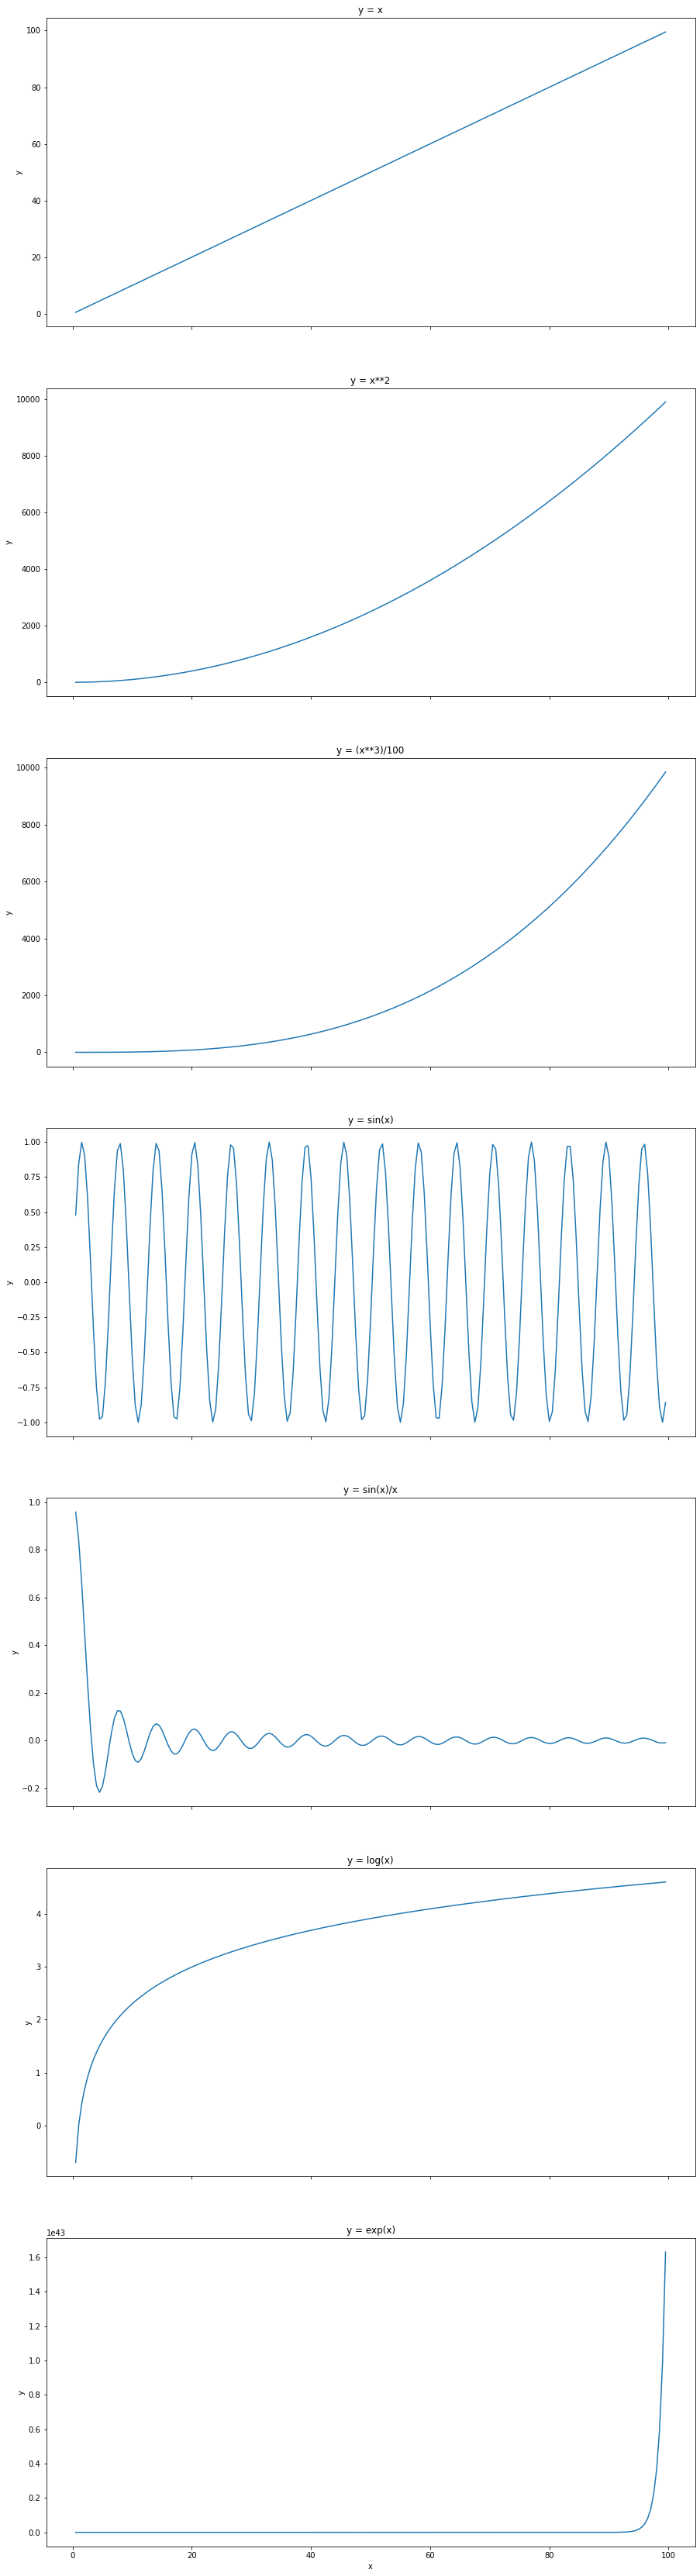

In [122]:
x = np.arange(0.5, 100.0, 0.5)

y1 = x
y2 = x**2
y3 = (x**3)/100
y4 = np.sin(x)/x
y5 = np.sin(x)
y6 = np.log(x)
y7 = np.exp(x)

fig, axs = plt.subplots(7,1)
fig.set_figheight(60)
fig.set_figwidth(15)


axs[0].plot(x,y1)
axs[0].set_title('y = x')
axs[1].plot(x,y2)
axs[1].set_title('y = x**2')
axs[2].plot(x,y3)
axs[2].set_title('y = (x**3)/100')
axs[4].plot(x,y4)
axs[4].set_title('y = sin(x)/x')
axs[3].plot(x,y5)
axs[3].set_title('y = sin(x)')
axs[5].plot(x,y6)
axs[5].set_title('y = log(x)')
axs[6].plot(x,y7)
axs[6].set_title('y = exp(x)')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
for ax in axs.flat:
    ax.label_outer()

# plt.show()


**10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [123]:
matrix = np.random.uniform(1.0,2.0,(20,5))
cols = ['a', 'b', 'c', 'd', 'e']
df = pd.DataFrame(data = matrix, columns=cols)
print("Dataframe:\n")
print(df)
print("=====================================")
print('column with the highest standard deviation:',df.std(axis=0).idxmax())
print('row with the lowest mean:',df.mean(axis=1).idxmin())

# print('')
# print(df.std(axis=0).argmax())
# print(df.mean(axis=1).idxmin())

Dataframe:

           a         b         c         d         e
0   1.816473  1.798198  1.859105  1.758812  1.894942
1   1.645452  1.548734  1.263202  1.557289  1.336114
2   1.017187  1.735845  1.010130  1.209695  1.880222
3   1.608584  1.652941  1.561528  1.595430  1.172542
4   1.172557  1.207070  1.379403  1.070620  1.268930
5   1.094875  1.047409  1.693319  1.898611  1.679643
6   1.279084  1.463786  1.658015  1.081285  1.154349
7   1.571559  1.974537  1.433498  1.571943  1.235058
8   1.745144  1.580507  1.070820  1.491482  1.215409
9   1.354594  1.820725  1.409783  1.006852  1.951453
10  1.002500  1.557402  1.112397  1.635076  1.911106
11  1.864419  1.740765  1.410450  1.688998  1.532962
12  1.856483  1.182769  1.223431  1.662098  1.556230
13  1.434228  1.668135  1.095025  1.859626  1.775679
14  1.224271  1.648948  1.802782  1.777751  1.989768
15  1.941386  1.790989  1.195126  1.652477  1.885558
16  1.519731  1.286551  1.843353  1.128714  1.805285
17  1.678556  1.863156  1.380940  

**11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [124]:
df2 = df.copy(deep=True)
# creating new column 'f' which is the sum of the columns “a”, “b”, “c”, “d”, “e”
df2['f'] = df2.sum(axis=1)
# creating new column 'g' where value is “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise
df2['g'] = np.where(df2['f'] < 8, 'LT8', 'GT8')
print('Dataframe:\n',df2)
print("=================================")
# finding number of rows in the dataframe where the value in the column “g” is “LT8”
print('number of rows in the dataframe where the value in the column “g” is “LT8”:',len(df2[(df2['g'] == 'LT8')]))
# finding standard deviation of the column “f” for the rows where the value in the column “g” is “LT8”
print('standard deviation of the column “f” for the rows where the value in the column "g" is "LT8":',df2[(df2['g'] == 'LT8')]['f'].std())
# finding standard deviation of the column “f” for the rows where the value in the column “g” is “GT8”
print('standard deviation of the column “f” for the rows where the value in the column "g" is "GT8":',df2[(df2['g'] == 'GT8')]['f'].std())


Dataframe:
            a         b         c         d         e         f    g
0   1.816473  1.798198  1.859105  1.758812  1.894942  9.127530  GT8
1   1.645452  1.548734  1.263202  1.557289  1.336114  7.350791  LT8
2   1.017187  1.735845  1.010130  1.209695  1.880222  6.853078  LT8
3   1.608584  1.652941  1.561528  1.595430  1.172542  7.591024  LT8
4   1.172557  1.207070  1.379403  1.070620  1.268930  6.098580  LT8
5   1.094875  1.047409  1.693319  1.898611  1.679643  7.413856  LT8
6   1.279084  1.463786  1.658015  1.081285  1.154349  6.636519  LT8
7   1.571559  1.974537  1.433498  1.571943  1.235058  7.786595  LT8
8   1.745144  1.580507  1.070820  1.491482  1.215409  7.103363  LT8
9   1.354594  1.820725  1.409783  1.006852  1.951453  7.543406  LT8
10  1.002500  1.557402  1.112397  1.635076  1.911106  7.218481  LT8
11  1.864419  1.740765  1.410450  1.688998  1.532962  8.237595  GT8
12  1.856483  1.182769  1.223431  1.662098  1.556230  7.481011  LT8
13  1.434228  1.668135  1.095025  1.

**12. Write a small piece of code to explain broadcasting in numpy.**


In [125]:
arr1 = np.array([10,20,30])
arr2 = np.array([
    [1],
    [2],
    [3]
])
print(arr1 + arr2)


[[11 21 31]
 [12 22 32]
 [13 23 33]]


Here before adding:

>To match the dimension, ones are padded on left side of shape of array having fewer dimension which is arr1

>After that if 2 dimensions are not matching then array with equal to 1 in that dimension is broadcasted to match the shape of other array

>Here both arrays are broadcasted to match dimension as both have 1.
If dimesion still doesn't match then numpy will raise an error

**13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [126]:
# function to compute argmin of numpy array
def compArgmin(narr):
    a = narr.flatten()
    print('Resulting argmin using user created function:',list(a).index(min(a)))

p = np.random.randint(1,50)    
q = np.random.randint(1,50)    
print(p, q)    
narr = np.random.randint(1,500, size=(p,q))
print('Matrix:',narr)
compArgmin(narr.copy())
print('Resulting argmin using np.argmin function:',narr.argmin())

13 9
Matrix: [[347  71 204 109 350   9 256 193 419]
 [483 273 216 146 463 405 194 373 413]
 [ 22 213 330 177 438 292 236 278 167]
 [246 214 330 343 415 315 275 311 290]
 [370 295 320  94 360 156 180 288 489]
 [ 14  34  42 134 281  46  23 467 155]
 [119 145  94  35 162 333 205 178 499]
 [312 236 249 339 237 499 165  44  75]
 [207 326  27 468 264 256 279 272 225]
 [448 469  55 126 221 170 445 495 298]
 [465 237 152 336 450 353  47 345 429]
 [185  44 281 486 317 438 105  57 252]
 [255 442 389 397 224 166 471 389 407]]
Resulting argmin using user created function: 5
Resulting argmin using np.argmin function: 5
